<a href="https://colab.research.google.com/github/ShrivastavAbhishek2004/AIML_Training/blob/main/LogisticRegression/AI_ML_LogisticRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
!git clone https://github.com/ShrivastavAbhishek2004/AIML_Training.git
%cd AIML_Training/LogisticRegression

Cloning into 'AIML_Training'...
remote: Enumerating objects: 19, done.
remote: Counting objects: 100% (19/19), done.
remote: Compressing objects: 100% (16/16), done.
remote: Total 19 (delta 4), reused 8 (delta 1), pack-reused 0 (from 0)
Receiving objects: 100% (19/19), 564.32 KiB | 20.15 MiB/s, done.
Resolving deltas: 100% (4/4), done.
/content/AIML_Training/LogisticRegression/AIML_Training/LogisticRegression


In [7]:
#Import Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score, classification_report


In [8]:
# Load data (replace with actual file path)
df = pd.read_csv('heart_disease.csv')
df=df.dropna()

              age         sex          cp    trestbps        chol         fbs  \
count  299.000000  299.000000  299.000000  299.000000  299.000000  299.000000   
mean    54.411371    0.688963    0.959866  131.806020  246.377926    0.147157   
std      9.098713    0.463694    1.035475   17.543307   51.989554    0.354856   
min     29.000000    0.000000    0.000000   94.000000  126.000000    0.000000   
25%     47.500000    0.000000    0.000000  120.000000  211.000000    0.000000   
50%     56.000000    1.000000    1.000000  130.000000  240.000000    0.000000   
75%     61.000000    1.000000    2.000000  140.000000  275.000000    0.000000   
max     77.000000    1.000000    3.000000  200.000000  564.000000    1.000000   

          restecg     thalach       exang     oldpeak       slope          ca  \
count  299.000000  299.000000  299.000000  299.000000  299.000000  299.000000   
mean     0.525084  149.715719    0.331104    1.053512    1.394649    0.739130   
std      0.526358   22.8137

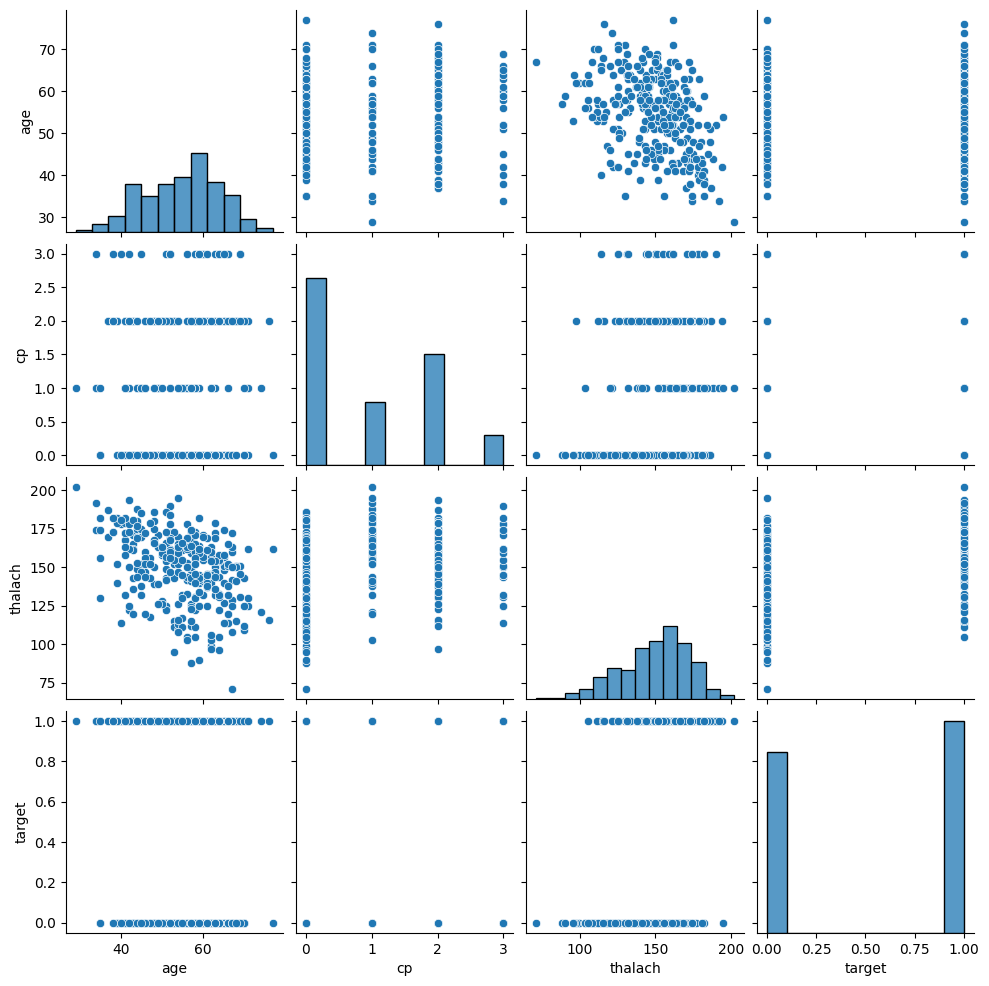

In [9]:
# EDA (basic)
print(df.describe())  # Check summary statistics
sns.pairplot(df[['age', 'cp', 'thalach', 'target']])
plt.show()


<Axes: >

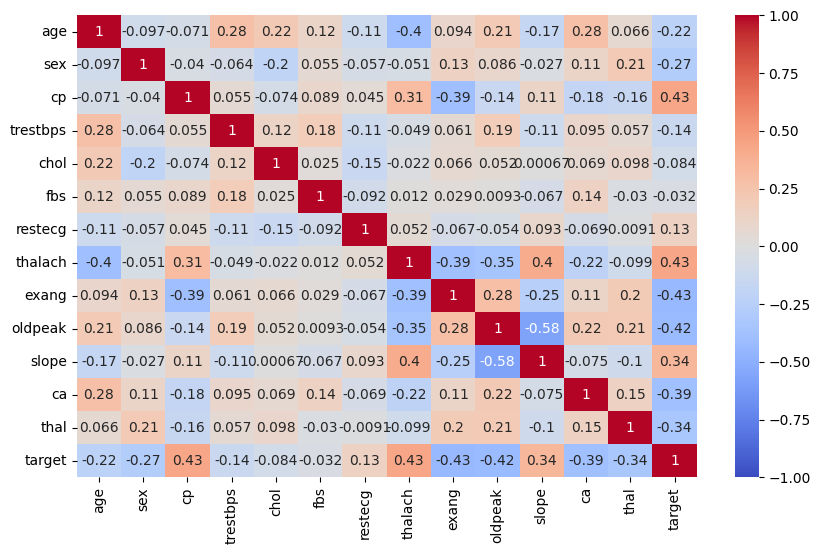

In [10]:
# Heatmap to show correlation
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', vmin=-1, vmax=1)


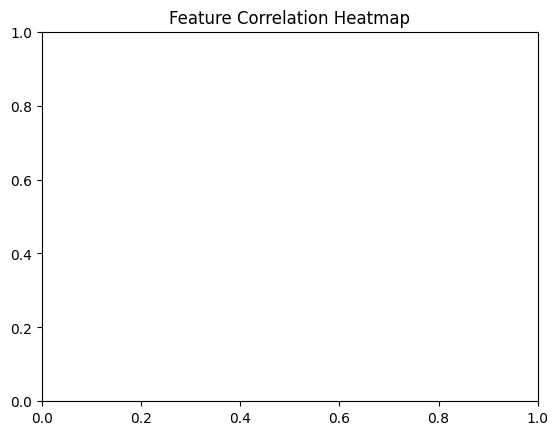

In [11]:
plt.title('Feature Correlation Heatmap')
plt.show()

In [12]:
# Feature and target selection
X = df[['age', 'cp', 'thalach']]
y = df['target']

In [13]:
# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [14]:
# Model initialization and training
model = LogisticRegression()
model.fit(X_train, y_train)


LogisticRegression()

In [15]:
# Predictions and performance metrics
y_pred = model.predict(X_test)
y_proba = model.predict_proba(X_test)[:, 1]

In [16]:
# Model performance metrics
print(f"Accuracy: {accuracy_score(y_test, y_pred):.2f}")
print("Classification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.73
Classification Report:
              precision    recall  f1-score   support

           0       0.62      0.83      0.71        24
           1       0.86      0.67      0.75        36

    accuracy                           0.73        60
   macro avg       0.74      0.75      0.73        60
weighted avg       0.76      0.73      0.74        60



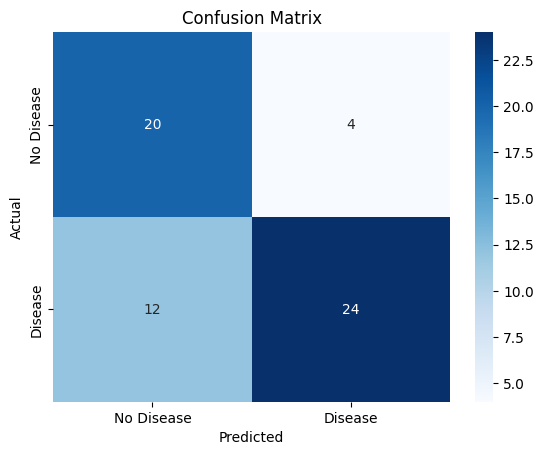

In [17]:
# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['No Disease', 'Disease'], yticklabels=['No Disease', 'Disease'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


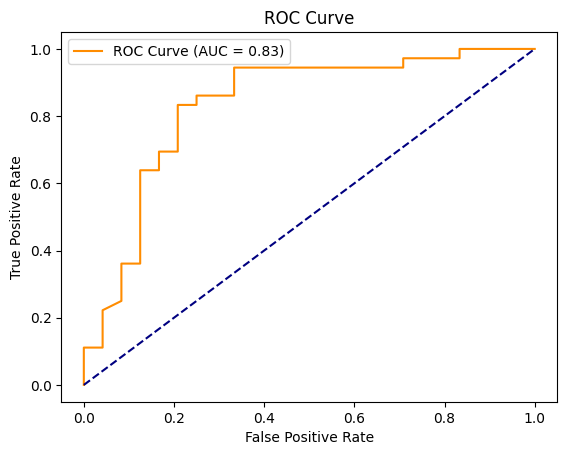

In [18]:
# ROC Curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_proba)
roc_auc = roc_auc_score(y_test, y_proba)

plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.2f})', color='darkorange')
plt.plot([0, 1], [0, 1], linestyle='--', color='navy')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

In [19]:
# User input function for prediction
def predict_heart_disease():
    age = int(input("Enter age: "))
    cp = int(input("Enter chest pain type (0-3): "))
    thalach = int(input("Enter maximum heart rate achieved: "))

    user_data = pd.DataFrame([[age, cp, thalach]], columns=['age', 'cp', 'thalach'])
    prediction = model.predict(user_data)

    result = "Heart Disease Present" if prediction[0] == 1 else "No Heart Disease"
    print(f"Prediction: {result}")

In [20]:
# Call the user input function to test
predict_heart_disease()

Enter age: 21
Enter chest pain type (0-3): 1
Enter maximum heart rate achieved: 100
Prediction: No Heart Disease
